# Lembretes

- Não teremos aula na quarta e sexta da semana que vem
- Novo prazo do projeto: 10/outubro/2022

## Na aula anterior...

Ao final do processo, os centróides de um algoritmo K-Means serão sempre pontos do conjunto de treino. Verdadeiro ou falso? 

Quando as iterações de um K-Means param?

## Algoritmos de Clusterização

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN

In [3]:
x, y = make_moons(n_samples = 1000, noise = 0.1, random_state = 123)
var_expl = ['F1', 'F2']
var_resp = 'Y'

df = pd.DataFrame(x, columns = var_expl)
df[var_resp] = y

df.head()

,F1,F2,Y
0,0.666374,0.823195,0
1,0.281627,0.947888,0
2,0.938688,0.133326,0
3,0.255610,-0.078239,1
4,0.754683,0.756513,0


In [4]:
df.Y.value_counts()

0    500
1    500
Name: Y, dtype: int64

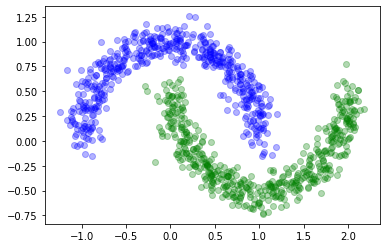

In [5]:
plt.scatter(df[df.Y == 0]['F1'], df[df.Y == 0]['F2'], color = 'blue', alpha = 0.3)
plt.scatter(df[df.Y == 1]['F1'], df[df.Y == 1]['F2'], color = 'green', alpha = 0.3)

plt.show()

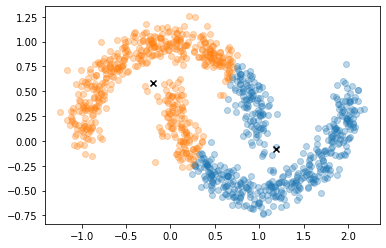

In [6]:
n_clusters = 2

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df[var_expl])
df['CLUSTER_2'] = kmeans.predict(df[var_expl])

## mostrando os pontos da base
for i in range(n_clusters):
    plt.scatter(df[df.CLUSTER_2 == i]['F1'], df[df.CLUSTER_2 == i]['F2'], alpha = 0.3)

## mostrando os centróides
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker = "x",
    color = "black"
)

plt.show()

### DBSCAN

1. Dado um ponto p, encontra todos os pontos q que estão a uma distância igual ou inferior a $\varepsilon$ de p;
2. Repete o processo para todos os pontos encontrados, e para todos os pontos novos, recursivamente, determinando assim um grupo;
3. Procura um ponto ainda não visitado para iniciar um novo grupo e repetir os passos 1 e 2.
4. Determina como ruído os pontos que não fazem parte de nenhum grupo.

<img src="imagens/cluster_dbscan.png"/>

In [8]:
df.head()

,F1,F2,Y,CLUSTER_2
0,0.666374,0.823195,0,1
1,0.281627,0.947888,0,1
2,0.938688,0.133326,0,0
3,0.255610,-0.078239,1,1
4,0.754683,0.756513,0,0


In [40]:
dbscan = DBSCAN(eps = 0.1, min_samples = 5, algorithm = 'brute')

df['DBSCAN'] = dbscan.fit_predict(df[var_expl])

In [41]:
df.DBSCAN.value_counts()

 1    493
 0    485
-1     22
Name: DBSCAN, dtype: int64

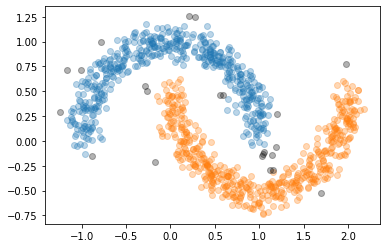

In [42]:
## mostrando os pontos da base
for i in range(5):
    plt.scatter(df[df.DBSCAN == i]['F1'], df[df.DBSCAN == i]['F2'], alpha = 0.3)

i = -1
plt.scatter(df[df.DBSCAN == i]['F1'], df[df.DBSCAN == i]['F2'], alpha = 0.3, color = "black")    

plt.show()

## Replicando as imagens

In [51]:
from sklearn.datasets import make_circles

In [61]:
x, y = make_circles(n_samples = 100)

var_expl = ['F1', 'F2']
var_resp = 'Y'

df = pd.DataFrame(x, columns = var_expl) * 20
df[var_resp] = y

df.head()

,F1,F2,Y
0,1.004648,-15.968428,1
1,-17.526134,-9.635073,0
2,-14.876424,-5.889993,1
3,-19.842294,2.506665,0
4,14.579373,13.690942,0


In [62]:
df.Y.value_counts()

1    50
0    50
Name: Y, dtype: int64

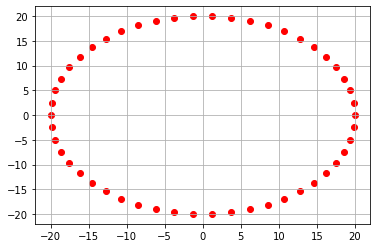

In [64]:
df.Y.value_counts()

plt.scatter(df[df.Y == 0]['F1'], df[df.Y == 0]['F2'], color = 'red')

plt.grid()

plt.show()

In [65]:
df_final = df[df.Y == 0].copy()

In [67]:
df_final.Y = 9

In [68]:
df_final

,F1,F2,Y
1,-17.526134,-9.635073e+00,9
3,-19.842294,2.506665e+00,9
4,14.579373,1.369094e+01,9
5,20.000000,0.000000e+00,9
7,10.716536,1.688656e+01,9
13,-19.371663,4.973798e+00,9
16,19.842294,2.506665e+00,9
17,8.515586,-1.809654e+01,9
18,14.579373,-1.369094e+01,9
20,-17.526134,9.635073e+00,9


In [69]:
n_centros = 3

x, y = make_blobs(
    n_samples = 500, 
    n_features = 2, 
    centers = n_centros,
    random_state = 1
)

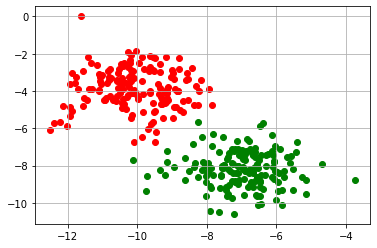

In [70]:
var_expl = ['F1', 'F2']
var_resp = 'Y'

df = pd.DataFrame(x, columns = var_expl)
df[var_resp] = y

df.head()

df.Y.value_counts()

plt.scatter(df[df.Y == 1]['F1'], df[df.Y == 1]['F2'], color = 'red')
plt.scatter(df[df.Y == 2]['F1'], df[df.Y == 2]['F2'], color = 'green')

plt.grid()

plt.show()

In [72]:
df_final_2 = df[(df.Y == 1) | (df.Y == 2)].copy()

In [73]:
df_final_2

,F1,F2,Y
0,-10.140908,-2.920365,1
1,-10.849168,-2.952467,1
2,-7.871060,-8.104166,2
4,-5.995896,-8.362981,2
6,-9.379727,-4.137525,1
...,...,...,...
494,-11.046780,-3.636690,1
495,-10.561501,-3.863662,1
496,-5.845008,-9.287020,2
497,-7.082700,-8.753367,2


In [79]:
df = pd.concat([df_final, df_final_2]).copy()

In [80]:
df.Y.value_counts()

1    167
2    166
9     50
Name: Y, dtype: int64

In [83]:
df.loc[df.Y == 9, 'Y'] = 0

In [82]:
df

,F1,F2,Y
1,-17.526134,-9.635073,9
3,-19.842294,2.506665,9
4,14.579373,13.690942,9
5,20.000000,0.000000,9
7,10.716536,16.886559,9
...,...,...,...
494,-11.046780,-3.636690,1
495,-10.561501,-3.863662,1
496,-5.845008,-9.287020,2
497,-7.082700,-8.753367,2


In [95]:
df.loc[df.Y == 0, 'F1'] = df.loc[df.Y == 0, 'F1']*1.25
df.loc[df.Y == 0, 'F2'] = df.loc[df.Y == 0, 'F2']*1.25

In [96]:
df.Y.value_counts()

1    167
2    166
0     50
Name: Y, dtype: int64

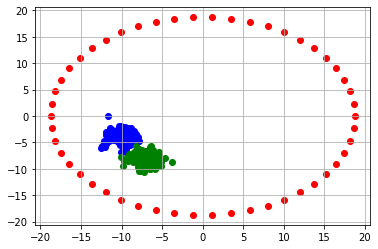

In [97]:

plt.scatter(df[df.Y == 0]['F1'], df[df.Y == 0]['F2'], color = 'red')
plt.scatter(df[df.Y == 1]['F1'], df[df.Y == 1]['F2'], color = 'blue')
plt.scatter(df[df.Y == 2]['F1'], df[df.Y == 2]['F2'], color = 'green')

plt.grid()

plt.show()

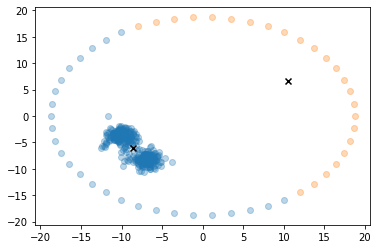

In [98]:
# CRIANDO UM KMEANS

n_clusters = 2

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df[var_expl])
df['KMEANS'] = kmeans.predict(df[var_expl])

## mostrando os pontos da base
for i in range(n_clusters):
    plt.scatter(df[df.CLUSTER_2 == i]['F1'], df[df.CLUSTER_2 == i]['F2'], alpha = 0.3)

## mostrando os centróides
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker = "x",
    color = "black"
)

plt.show()

In [127]:
# CRIANDO UM DBSCAN

dbscan = DBSCAN(eps = 4.5, min_samples = 3, algorithm = 'brute')
df['DBSCAN'] = dbscan.fit_predict(df[var_expl])

df.DBSCAN.value_counts()

1    333
0     50
Name: DBSCAN, dtype: int64

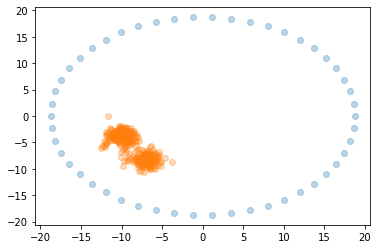

In [128]:
## mostrando os pontos da base
for i in range(2):
    plt.scatter(df[df.DBSCAN == i]['F1'], df[df.DBSCAN == i]['F2'], alpha = 0.3)

i = -1
plt.scatter(df[df.DBSCAN == i]['F1'], df[df.DBSCAN == i]['F2'], alpha = 0.3, color = "black")    

plt.show()

## Algoritmos Hierárquicos